# IMPORT THE NECESSARY LIBRARIES

In [83]:
import pandas       # reading the dataset
import numpy as np  # operating the data
import matplotlib.pyplot as plt # visualization
import seaborn as sns  # visualization
sns.set()        
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [84]:
data = pandas.read_csv('ds_salaries.csv') # read the dataset

# Dataset: Data Science employees <br/>
# AIM : detect the employee salary
# method used: regression


# Dataset Stats and visualizations

In [85]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


info about the data set

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [87]:
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


experience_level has 4 Level: <br/>
EN > Entry-level /Junior<br/>
MI > Mid-level / Intermediate<br/>
SE > Senior-level/Expert<br/>
EX > Executive-level / Director<br/><br/>


employment_type has 4 types:<br/>
PT > Part-time<br/>
FT > Full-time<br/>
CT > contract<br/>
FL > Freelance<br/>

checking feautres with descrete values to encode later

In [88]:
print(set(data['experience_level']))

{'SE', 'EX', 'MI', 'EN'}


In [89]:
print(set(data['employment_type']))

{'CT', 'PT', 'FT', 'FL'}


In [90]:
print(set(data['company_size']))

{'S', 'L', 'M'}


In [91]:
print(set(data['salary_currency']))	#time consuming to encode. maybe dropping it? , we will check if it effects the relations between other feautres

{'ILS', 'AUD', 'THB', 'DKK', 'GBP', 'PLN', 'CZK', 'TRY', 'HKD', 'USD', 'HUF', 'CHF', 'CLP', 'EUR', 'CAD', 'BRL', 'SGD', 'INR', 'JPY', 'MXN'}


check missing values

In [92]:
data= data.dropna() #drop empty values
data = data.drop_duplicates() # Drop the duplicate entries
data.isnull().sum()
#check missing values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [94]:
data['job_title'].value_counts()

job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64

In [95]:
data['experience_level'].value_counts()

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64

In [96]:
data['employee_residence'].value_counts() # most of employees lives in US , rest are outliers , we can re create this varibale by living in US as 1 and 0 if not

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64

In [97]:
data['company_location'].value_counts() # samr thing here

company_location
US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

## PLOTS

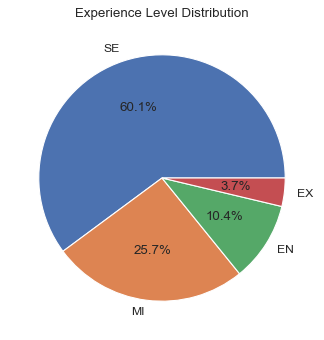

In [98]:
plt.figure(figsize=(6,5),dpi=80)
# calculate the number of individuals in each experience level
level_counts = data['experience_level'].value_counts()

# create a pie chart
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%')

# add title
plt.title('Experience Level Distribution')

# display plot
plt.show()

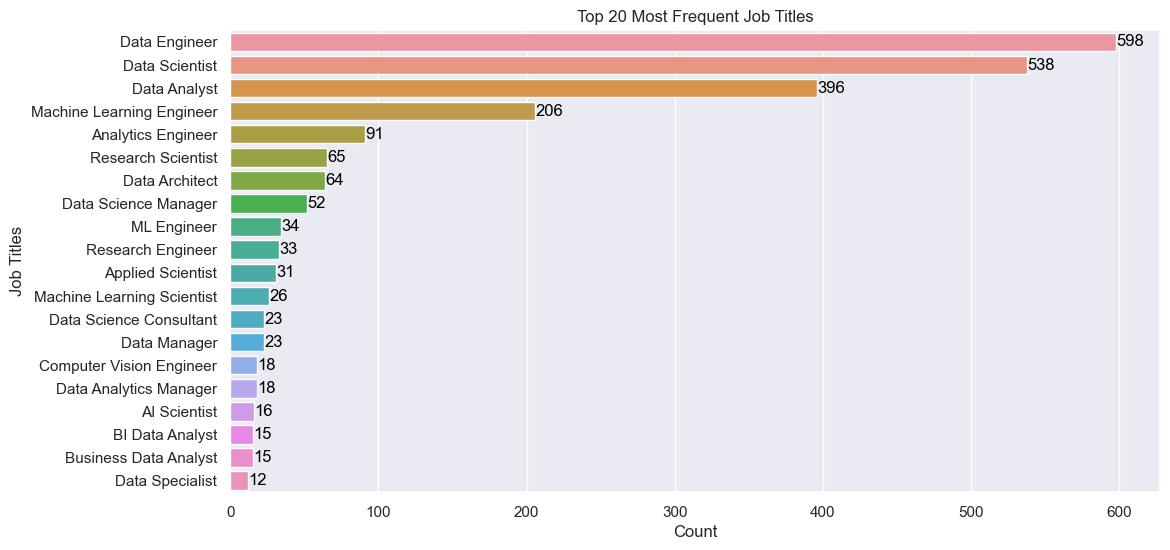

In [99]:
# Extract the "job title" column
job_titles = data['job_title']

# Calculate the frequency of each job title
title_counts = job_titles.value_counts()

# Extract the top 20 most frequent job titles
top_20_titles = title_counts.head(20)

# Create a DataFrame for the top 20 titles
top_20_df = pandas.DataFrame({'Job Title': top_20_titles.index, 'Count': top_20_titles.values})

# Plotting the count plot
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
ax = sns.barplot(data=top_20_df, x='Count', y='Job Title')
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.title('Top 20 Most Frequent Job Titles')

# Add count labels to the bars
for i, v in enumerate(top_20_df['Count']):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

# plt.tight_layout()
plt.show()

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

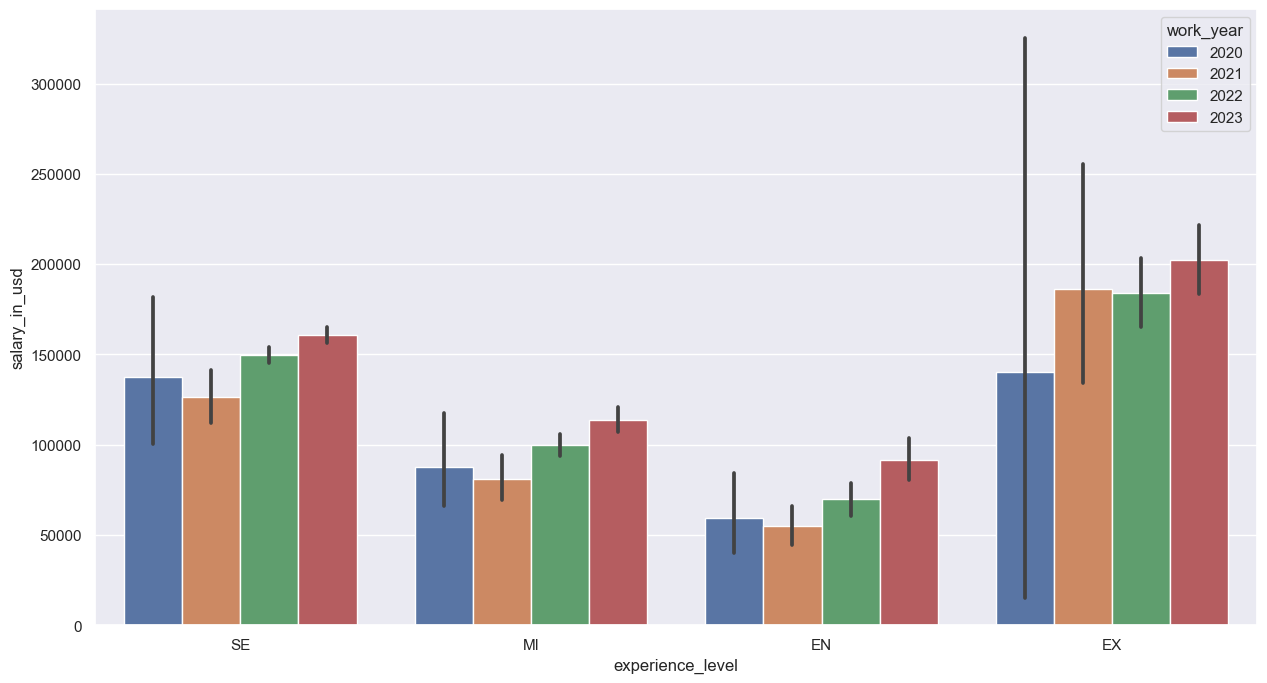

In [100]:
plt.figure(figsize=(15,8))
sns.barplot(data=data,x='experience_level',y='salary_in_usd',hue='work_year')

we can see salaries of employees of diffrent expreince level on years 2020-2023. we can see that 2023 has the highest salary in all levels 

Lets say if remote ratio effects the salary rates<br/>

0 --> off site<br/>
50 --> hybrid<br/>
100 --> on site<br/>

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

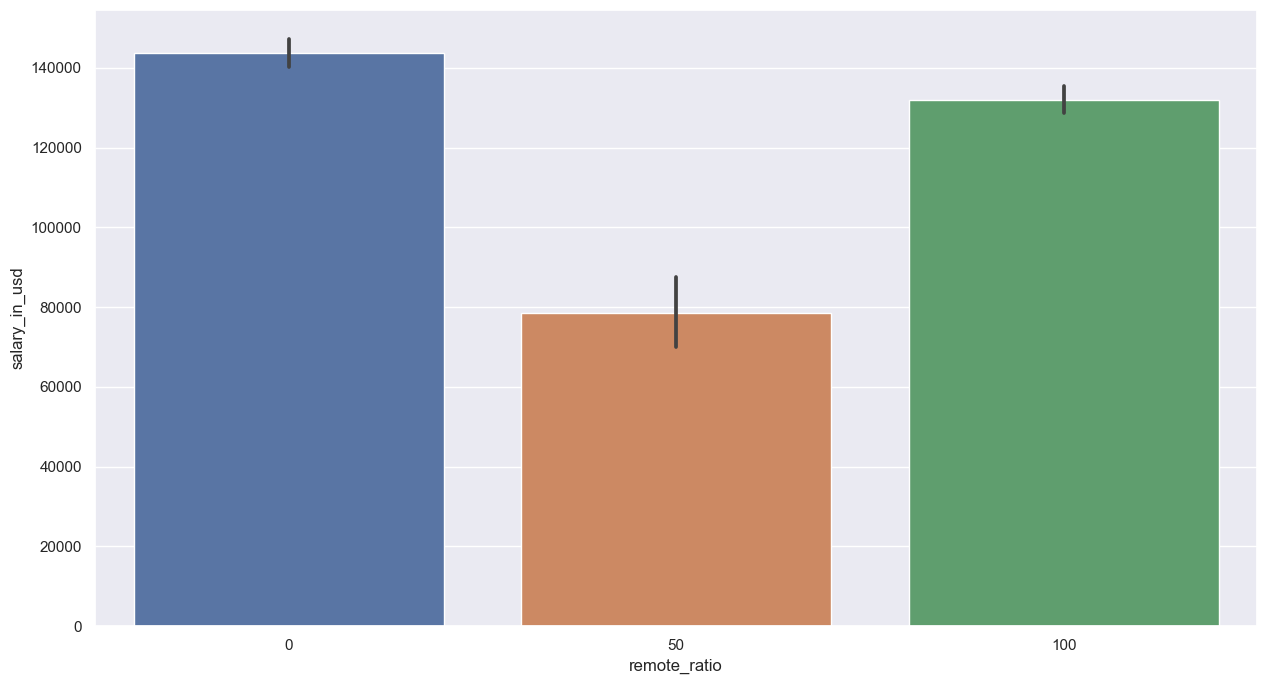

In [101]:
plt.figure(figsize=(15,8))
sns.barplot(data=data,x='remote_ratio',y='salary_in_usd')

looks like online employees is getting paid more. this can determine the salary of an employee

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

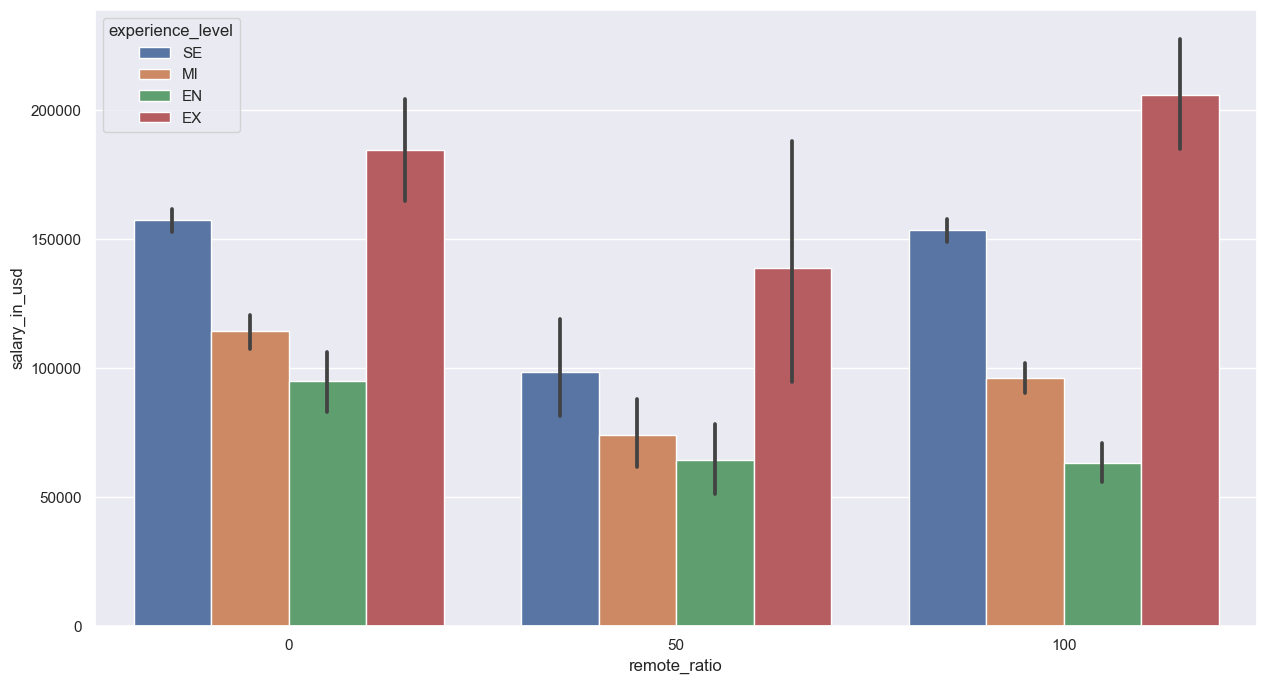

In [102]:
plt.figure(figsize=(15,8))
sns.barplot(data=data,x='remote_ratio',y='salary_in_usd',hue='experience_level')

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

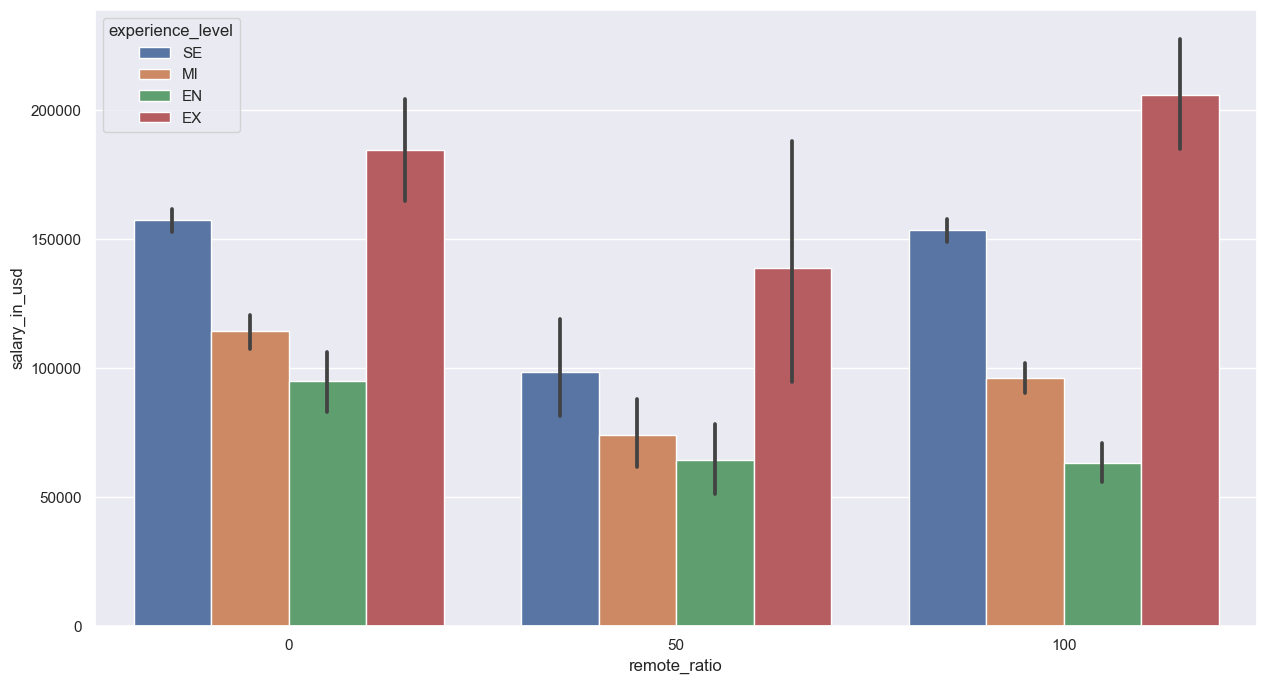

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=data,x='remote_ratio',y='salary_in_usd',hue='experience_level')

looks like employees with executive level and works on site have the highest salary 

# PRE PROCESSING



## LABEL ENCODING

**for Experience level :** <br/>
Senior level ---> 0 <br/>
Mid/intermidiate level ---> 1 <br/>
Entry level ---> 2 <br/>
Executive level ---> 3<br/> <br/>
**For employment type :**<br>
for Part time type ---> 0 <br/>
for Full time part ---> 1 <br/>
for Contract type ---> 2 <br/>
for Free Lance type ---> 3 <br/><br/>
**For Company Size:** <br/>
for Small size ---> 0 <br/>
for midium size ---> 1 <br/>
for large size ---> 2 <br/>

In [103]:
# create the encoding map
encoding_map={
'experience_level': { 'SE':0, 'MI':1, 'EN':2, 'EX':3},
'employment_type': {'PT': 0, 'FT': 1, 'CT':2, 'FL':3},
'company_size': {'S':0, 'M': 1 , 'L':2 }
}


In [104]:
data.replace(encoding_map, inplace=True)# replace labeles with the encoded equivlant

In [105]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,0,1,Principal Data Scientist,80000,EUR,85847,ES,100,ES,2
1,2023,1,2,ML Engineer,30000,USD,30000,US,100,US,0
2,2023,1,2,ML Engineer,25500,USD,25500,US,100,US,0
3,2023,0,1,Data Scientist,175000,USD,175000,CA,100,CA,1
4,2023,0,1,Data Scientist,120000,USD,120000,CA,100,CA,1


catogrize job titles as Data engineer, data Scientist, Data Analysts and Other since these 4 has the highest frequency

In [106]:
data['job_title'] = np.where(data['job_title']=="Data Engineer",data['job_title'],
                            np.where(data['job_title']=="Data Scientist",data['job_title'],
                              np.where(data['job_title']=="Data Analyst",data['job_title'],
                                      np.where(data['job_title']=="Machine Learning Engineer",
                                      data['job_title'],"Other"))))

In [107]:
data['job_title'].value_counts()

job_title
Other                        846
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Name: count, dtype: int64

In [108]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,0,1,Other,80000,EUR,85847,ES,100,ES,2
1,2023,1,2,Other,30000,USD,30000,US,100,US,0
2,2023,1,2,Other,25500,USD,25500,US,100,US,0
3,2023,0,1,Data Scientist,175000,USD,175000,CA,100,CA,1
4,2023,0,1,Data Scientist,120000,USD,120000,CA,100,CA,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,0,1,Data Scientist,412000,USD,412000,US,100,US,2
3751,2021,1,1,Other,151000,USD,151000,US,100,US,2
3752,2020,2,1,Data Scientist,105000,USD,105000,US,100,US,0
3753,2020,2,2,Other,100000,USD,100000,US,100,US,2


although 'work year' , 'remote_ratio' are represented in numbers, they are categorical_features not numerical values , so need to be encoded as well

In [109]:
# Label encoding for categorical features
encoder = LabelEncoder()
categorical_features = ['work_year' ,'job_title', 'remote_ratio']
for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])

In [110]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,3,0,1,4,80000,EUR,85847,ES,2,ES,2
1,3,1,2,4,30000,USD,30000,US,2,US,0
2,3,1,2,4,25500,USD,25500,US,2,US,0
3,3,0,1,2,175000,USD,175000,CA,2,CA,1
4,3,0,1,2,120000,USD,120000,CA,2,CA,1


**For salary_currency , employee residence and company_location , we can relate it to US since almost 80% of the data are from US**

In [111]:
data['employee_residence'] = np.where(data['employee_residence']=="US",1,0)
data['salary_currency'] = np.where(data['salary_currency']=="USD",1,0)
data['company_location'] = np.where(data['company_location']=="US",1,0)


rename the columns to be referred to US only

In [112]:
data.rename(columns={'company_location':'company_location_US',
                     'employee_residence': 'employee_residence_US',
                     'salary_currency': "salary_currency_USD"
},inplace=True)

In [113]:
data.head() #  now all data is numbers and ready to be normilzied and trained

,work_year,experience_level,employment_type,job_title,salary,salary_currency_USD,salary_in_usd,employee_residence_US,remote_ratio,company_location_US,company_size
0,3,0,1,4,80000,0,85847,0,2,0,2
1,3,1,2,4,30000,1,30000,1,2,1,0
2,3,1,2,4,25500,1,25500,1,2,1,0
3,3,0,1,2,175000,1,175000,0,2,0,1
4,3,0,1,2,120000,1,120000,0,2,0,1


## FEAUTRE SELECTION

<Axes: >

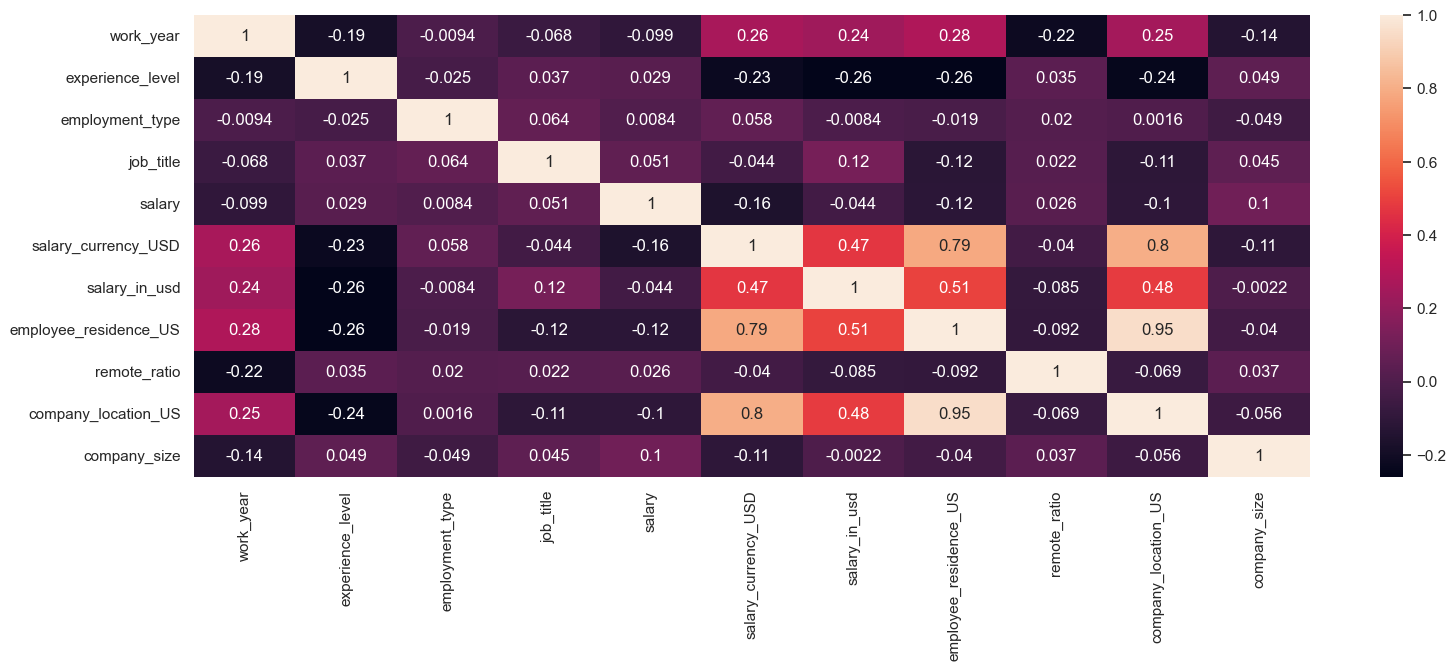

In [114]:
plt.figure(figsize=(18,6))
sns.heatmap(data.corr(), annot=True)

In [115]:
#split into feautres and target

X=data.drop('salary_in_usd',axis=1)
y=data['salary_in_usd']
feautres = X.columns.tolist()

In [116]:
# Normalization

from sklearn.preprocessing import normalize

X = normalize(X, norm='l2')

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X, y)
transformedX = sel.transform(X)

In [118]:
print("Selected features: ", sel.get_support())
print("Selected features: ", np.array(feautres)[sel.get_support(indices=True)])

Selected features:  [ True False  True  True False False False  True False False]
Selected features:  ['work_year' 'employment_type' 'job_title' 'remote_ratio']


Random Forest classifier chose 'work_year' 'employment_type' 'job_title' 'remote_ratio'

In [119]:
from sklearn.tree import DecisionTreeRegressor

sel=SelectFromModel(DecisionTreeRegressor(random_state=0))
sel.fit(X, y)
transformedX = sel.transform(X)

In [120]:
print("Selected features: ", sel.get_support())
print("Selected features: ", np.array(feautres)[sel.get_support(indices=True)])

Selected features:  [ True False  True False False  True False False False False]
Selected features:  ['work_year' 'employment_type' 'salary_currency_USD']


# Experiments

Aim is to predict the salary of the employee <br/>

Method used : Regression

In [121]:
# 80% Train, 10% Validation, %10 Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [122]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2584
Total # of sample in train dataset: 2067
Total # of sample in validation dataset: 258
Total # of sample in test dataset: 259


In [123]:
from sklearn.metrics import mean_absolute_error, r2_score

## Random Forest Regressor Model

In [124]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(X_train,y_train)

pred = rf.predict(X_valid)

mae = mean_absolute_error(y_valid,pred)

rf_r2= r2_score(y_valid, pred)

In [125]:
print("MEA RandomForestRegressor: ", mae)
print("r2 RandomForestregressor: ", rf_r2)

MEA RandomForestRegressor:  4184.743364108869
r2 RandomForestregressor:  0.8673191183787374


### Hyper parameter tuning for Random forest regression

In [126]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# define parameters
parameters = {
    "n_estimators" : [50,100,200],
    "max_depth" : [None, 5, 10], 
    "min_samples_split" : [2,5], 
    "min_samples_leaf" : [1,2] 
}

# create Gridsearch object
gcv = GridSearchCV(rf, parameters, cv=5)

# fit the Gridsearch object
gcv.fit(X_train, y_train)


print("Best parameters: ", gcv.best_params_)
print("Cross validation score", gcv.best_score_)

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Cross validation score 0.9507174037247624


In [127]:
# get the score for the validation data
rf_valid_score = gcv.score(X_valid, y_valid)

# print score
print("Validation Set Score: ", rf_valid_score)

Validation Set Score:  0.8715873140675118


## Decision Tree Regressor Model

In [128]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

pred = dt.predict(X_valid)

mae = mean_absolute_error(y_valid,pred)

dt_r2= r2_score(y_valid, pred) 

In [129]:
print("MEA Decision Tree Regressor: ", mae)
print("r2 Decision Tree Regressor: ", rf_r2)

MEA Decision Tree Regressor:  4218.795865633076
r2 Decision Tree Regressor:  0.8673191183787374


### Hyper parameter tuning for Decision tree regressor

In [130]:
# make params
parameters={
    "splitter":["best","random"],
    "max_depth" : [1,3,5],
    "min_samples_leaf":[1,2,3,4,5],
    "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
    "max_features":[1.0,"log2","sqrt",None],
    "max_leaf_nodes":[None,10,20,30,40,50] 
}

# make gridsearch object
gcv = GridSearchCV(dt, parameters, cv=5)

# fit the data
gcv.fit(X_train, y_train)

# print the best params and the crossvalidation score
print("Best parameters: ", gcv.best_params_)
print("Cross validation score: ", gcv.best_score_)

Best parameters:  {'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
Cross validation score:  0.6342638311515962


In [131]:
# make predicitons with validation data
dr_valid_score = gcv.score(X_valid, y_valid)

# print score
print("Validaton Score", dr_valid_score)

Validaton Score 0.5721485303716108


## Gradient Boosting Regression Model

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

# define model
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

pred = gbr.predict(X_valid)

mae = mean_absolute_error(y_valid,pred)

gbr_r2= r2_score(y_valid, pred)

In [133]:
print("MEA Gradient Boosting Regresser: ", mae)
print("r2  Gradient Boosting Regresser: ", rf_r2)

MEA Gradient Boosting Regresser:  9784.086047096009
r2  Gradient Boosting Regresser:  0.8673191183787374


### Hyper parameter tuning for GBR

In [134]:
#define params
parameters = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}

# create gridseatchobject
gcv = GridSearchCV(gbr, parameters, cv=5)

# fit gridsearch
gcv.fit(X_train, y_train)

# print best params and validaton score
print("Best parameters: ", gcv.best_params_)
print("Cross Validation Score: ", gcv.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Cross Validation Score:  0.9585710040769231


In [135]:
gbr_valid_score = gcv.score(X_valid, y_valid)

print("Validation Score: ", gbr_valid_score)

Validation Score:  0.8327530553342636


# Evaluating the Models with best hyper parameters and using the test set

In [137]:
models={
 'RandomForestRegressor': RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=5,n_estimators=50),
 'DecisionTreeRegressor':DecisionTreeRegressor(max_depth=5, max_features='log2', max_leaf_nodes=None, min_samples_leaf= 1, min_weight_fraction_leaf= 0.1, splitter= 'best'),
 'GradientBoostingRegressor':GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2, n_estimators=200)
}

for m in models:
    model = models[m]
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(f'{m} Test (Final) MAE Score: {mean_absolute_error(predictions, y_test)}')
    score = model.score(X_test, y_test)
    r2= r2_score(y_test, predictions)
    print(f'{m} r2 score =>{r2} ') 
    print(f'{m} test score => {score}\n')

RandomForestRegressor Test (Final) MAE Score: 3643.5366786626064
RandomForestRegressor r2 score =>0.9776806598410777 
RandomForestRegressor test score => 0.9776806598410777

DecisionTreeRegressor Test (Final) MAE Score: 29599.17727075594
DecisionTreeRegressor r2 score =>0.6042021264139089 
DecisionTreeRegressor test score => 0.6042021264139089

GradientBoostingRegressor Test (Final) MAE Score: 4069.836181239954
GradientBoostingRegressor r2 score =>0.9805028433348509 
GradientBoostingRegressor test score => 0.9805028433348509

